# Importing Library + Setting Path.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

path = r'C:\Users\Chaot\Python stuff\07 - Basics of Machine Learning for Analysts'

# Importing Dataframes, removing Gdansk, Roma and Tours.

In [2]:
# Since we did the scaled and unscaled and found that scaling did nothing, we're just going to use the unscaled data.

unscaled_temps = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', '1.4_unscaled_temps.csv'))
unscaled_temps

,Unnamed: 0,DATE,MONTH,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,6.5,0.8,10.9,3.7,-0.9,7.9,2.4,...,5.9,-5.9,-8.5,-3.2,4.2,2.2,4.9,8.5,6.0,10.9
1,1,19600102,1,6.1,3.3,10.1,2.9,2.2,4.4,2.3,...,4.9,-9.5,-10.5,-8.5,4.0,3.0,5.0,8.9,5.6,12.1
2,2,19600103,1,8.5,5.1,9.9,3.1,-0.5,6.4,2.7,...,3.1,-9.5,-10.0,-8.9,2.4,1.3,4.1,10.5,8.1,12.9
3,3,19600104,1,6.3,3.8,10.6,2.0,-2.0,3.0,2.0,...,4.9,-11.5,-12.9,-10.0,1.2,0.4,2.3,7.4,7.3,10.6
4,4,19600105,1,3.0,-0.7,6.0,2.0,0.7,2.8,2.5,...,4.9,-9.3,-12.0,-6.5,3.3,0.8,4.3,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,10,15.9,11.4,21.4,18.2,12.1,24.4,11.7,...,12.0,0.6,-1.4,2.6,11.5,8.2,14.2,10.7,7.9,13.5
22946,22946,20221028,10,16.7,14.3,21.9,15.9,10.6,21.2,11.7,...,11.7,2.3,0.6,4.0,12.5,11.0,14.3,10.7,7.9,13.5
22947,22947,20221029,10,16.7,13.1,22.4,13.4,8.6,18.2,11.7,...,14.2,3.3,2.1,4.5,13.1,12.1,14.4,10.7,7.9,13.5
22948,22948,20221030,10,15.4,11.6,21.1,15.0,9.1,20.9,11.7,...,8.1,3.4,2.7,4.1,7.5,5.1,12.4,10.7,7.9,13.5


In [3]:
 # Excluding Gdansk, Roma & Tours.
unscaled_temps = unscaled_temps[['DATE','MONTH',
 'BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()
unscaled_temps

,DATE,MONTH,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,6.5,0.8,10.9,3.7,-0.9,7.9,2.4,-0.4,...,5.9,-5.9,-8.5,-3.2,4.2,2.2,4.9,8.5,6.0,10.9
1,19600102,1,6.1,3.3,10.1,2.9,2.2,4.4,2.3,1.4,...,4.9,-9.5,-10.5,-8.5,4.0,3.0,5.0,8.9,5.6,12.1
2,19600103,1,8.5,5.1,9.9,3.1,-0.5,6.4,2.7,1.7,...,3.1,-9.5,-10.0,-8.9,2.4,1.3,4.1,10.5,8.1,12.9
3,19600104,1,6.3,3.8,10.6,2.0,-2.0,3.0,2.0,0.4,...,4.9,-11.5,-12.9,-10.0,1.2,0.4,2.3,7.4,7.3,10.6
4,19600105,1,3.0,-0.7,6.0,2.0,0.7,2.8,2.5,1.1,...,4.9,-9.3,-12.0,-6.5,3.3,0.8,4.3,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,15.9,11.4,21.4,18.2,12.1,24.4,11.7,7.9,...,12.0,0.6,-1.4,2.6,11.5,8.2,14.2,10.7,7.9,13.5
22946,20221028,10,16.7,14.3,21.9,15.9,10.6,21.2,11.7,7.9,...,11.7,2.3,0.6,4.0,12.5,11.0,14.3,10.7,7.9,13.5
22947,20221029,10,16.7,13.1,22.4,13.4,8.6,18.2,11.7,7.9,...,14.2,3.3,2.1,4.5,13.1,12.1,14.4,10.7,7.9,13.5
22948,20221030,10,15.4,11.6,21.1,15.0,9.1,20.9,11.7,7.9,...,8.1,3.4,2.7,4.1,7.5,5.1,12.4,10.7,7.9,13.5


In [4]:
pleasant_weather = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Splitting Data & Creating Training data.

In [5]:
X = unscaled_temps.drop(['DATE','MONTH'], axis=1)
y = pleasant_weather.drop(['DATE'], axis=1)
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [6]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


# Decision Tree Algorithm.

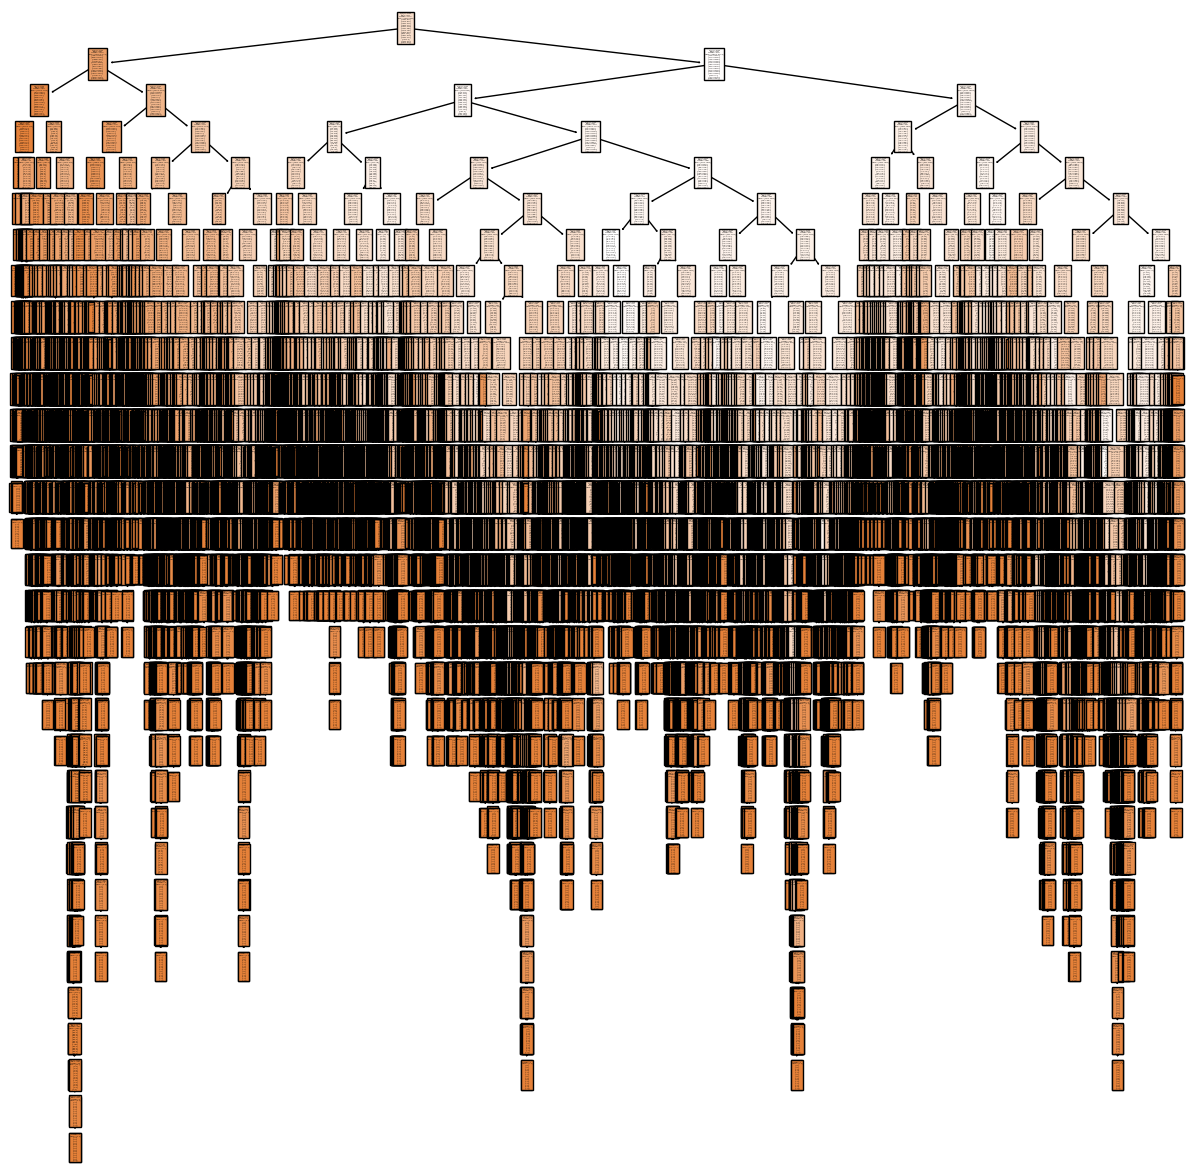

In [9]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt, filled=True)
plt.savefig(os.path.join(path, 'Supervised', '1.5_decision_tree.png'))
plt.show()

In [10]:
# Cross variation Method for y_pred training accuracy.
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.4613641777767463


In [11]:
locations = list({x.split("_")[0] for x in unscaled_temps.columns if x not in ['MONTH','DATE']})
locations.sort()

G:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


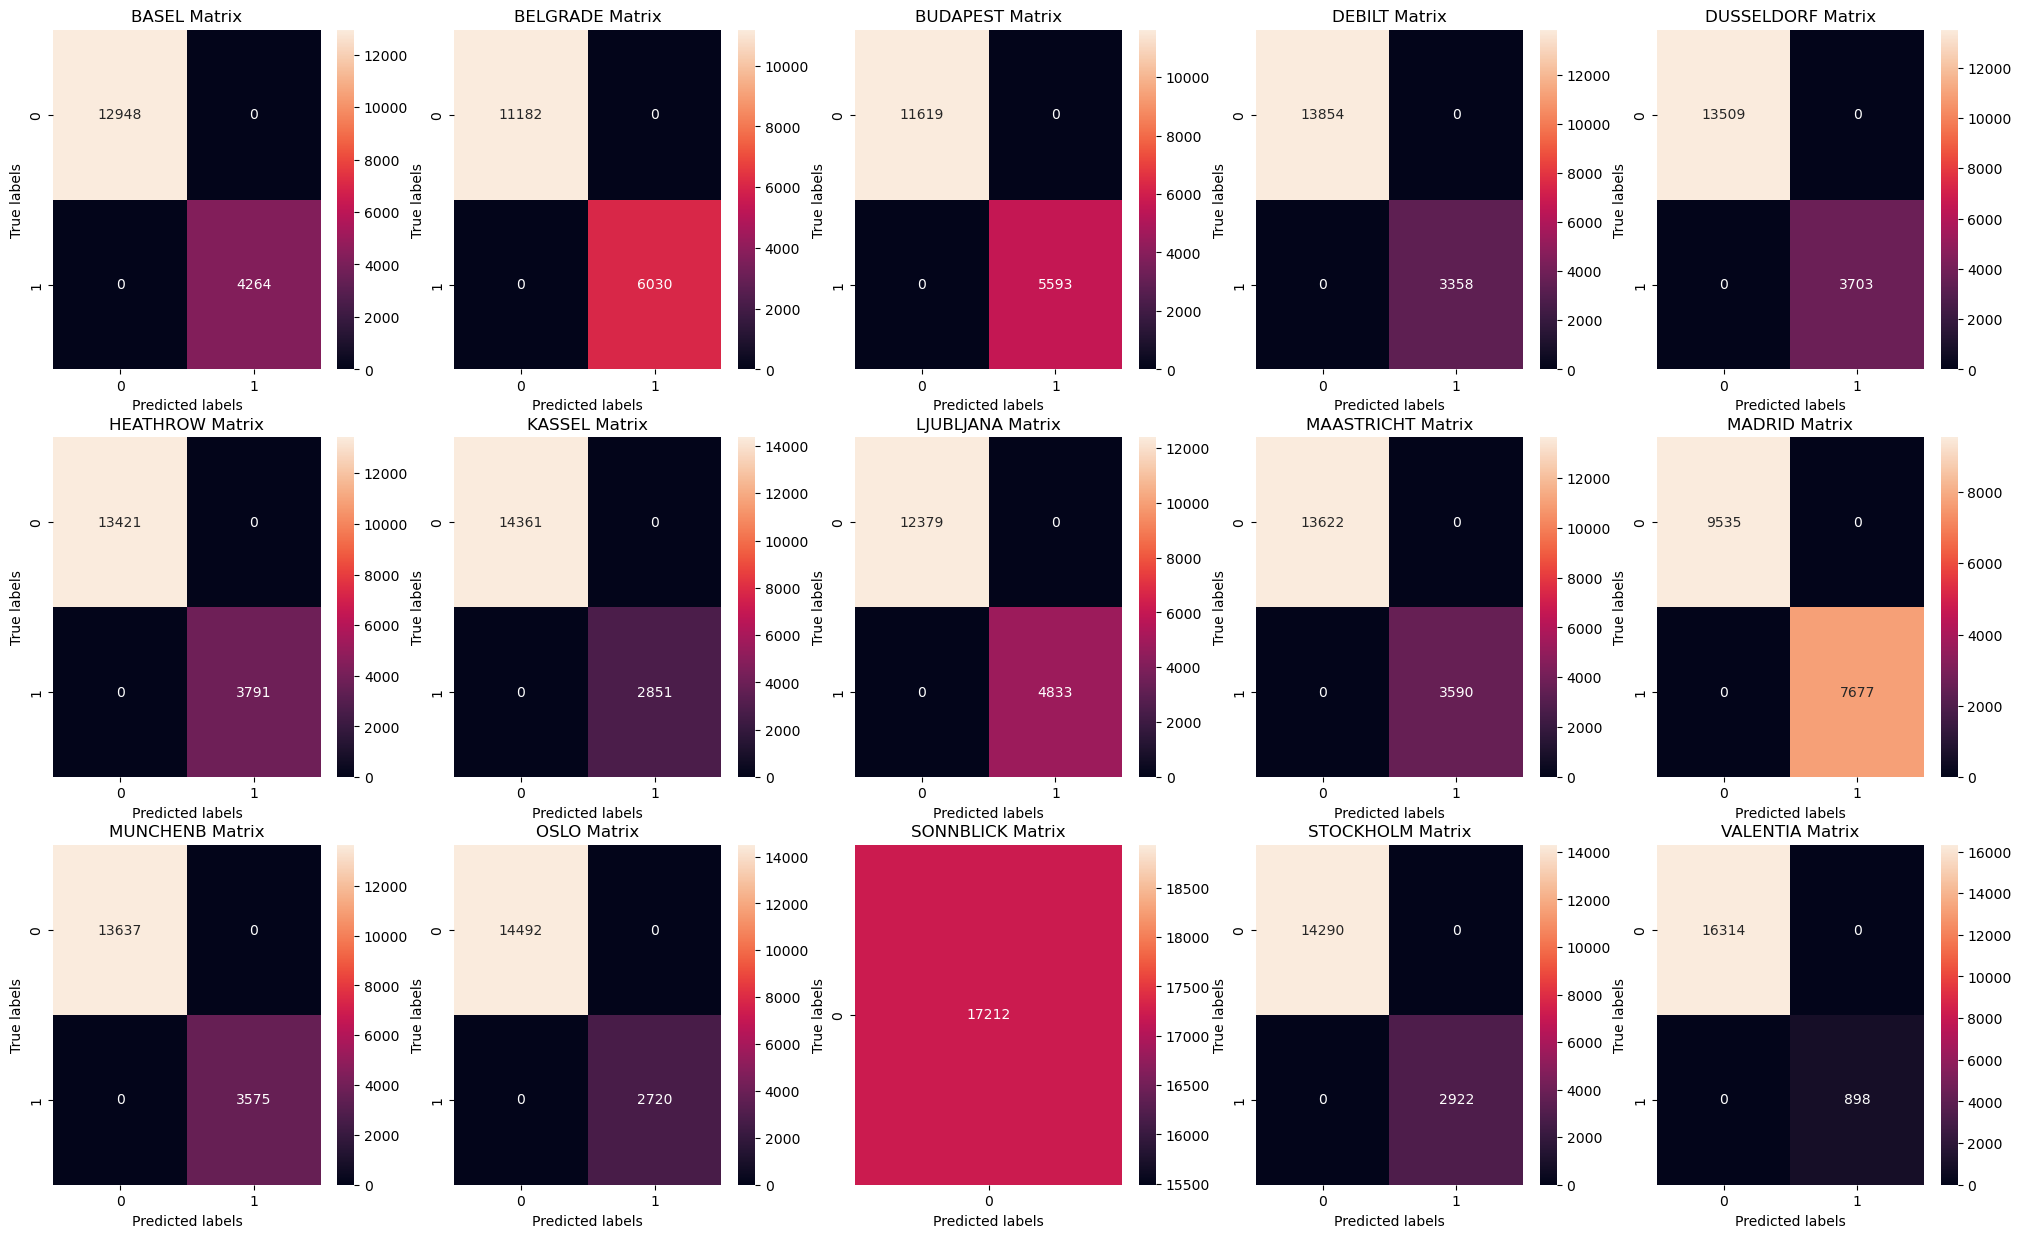

In [12]:
#Confusion matrix based on the last "k" in the sequence (Training data)

key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        
figure.savefig(os.path.join(path, 'Supervised', '1.5_ytrain_dtree_confusion_matrices.png'))

In [13]:
# Cross variation Method for y_pred testing accuracy.

y_pred_test = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred_test))
multilabel_confusion_matrix(y_test, y_pred_test)

Test accuracy score:  0.47455559428372257


array([[[3866,  472],
        [ 430,  970]],

       [[3191,  585],
        [ 553, 1409]],

       [[3368,  532],
        [ 518, 1320]],

       [[4255,  382],
        [ 368,  733]],

       [[4098,  409],
        [ 403,  828]],

       [[4098,  472],
        [ 408,  760]],

       [[4489,  326],
        [ 315,  608]],

       [[3675,  520],
        [ 448, 1095]],

       [[4162,  400],
        [ 375,  801]],

       [[2821,  347],
        [ 404, 2166]],

       [[4174,  372],
        [ 371,  821]],

       [[4544,  335],
        [ 306,  553]],

       [[5738,    0],
        [   0,    0]],

       [[4433,  333],
        [ 351,  621]],

       [[5306,  156],
        [ 176,  100]]], dtype=int64)

G:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


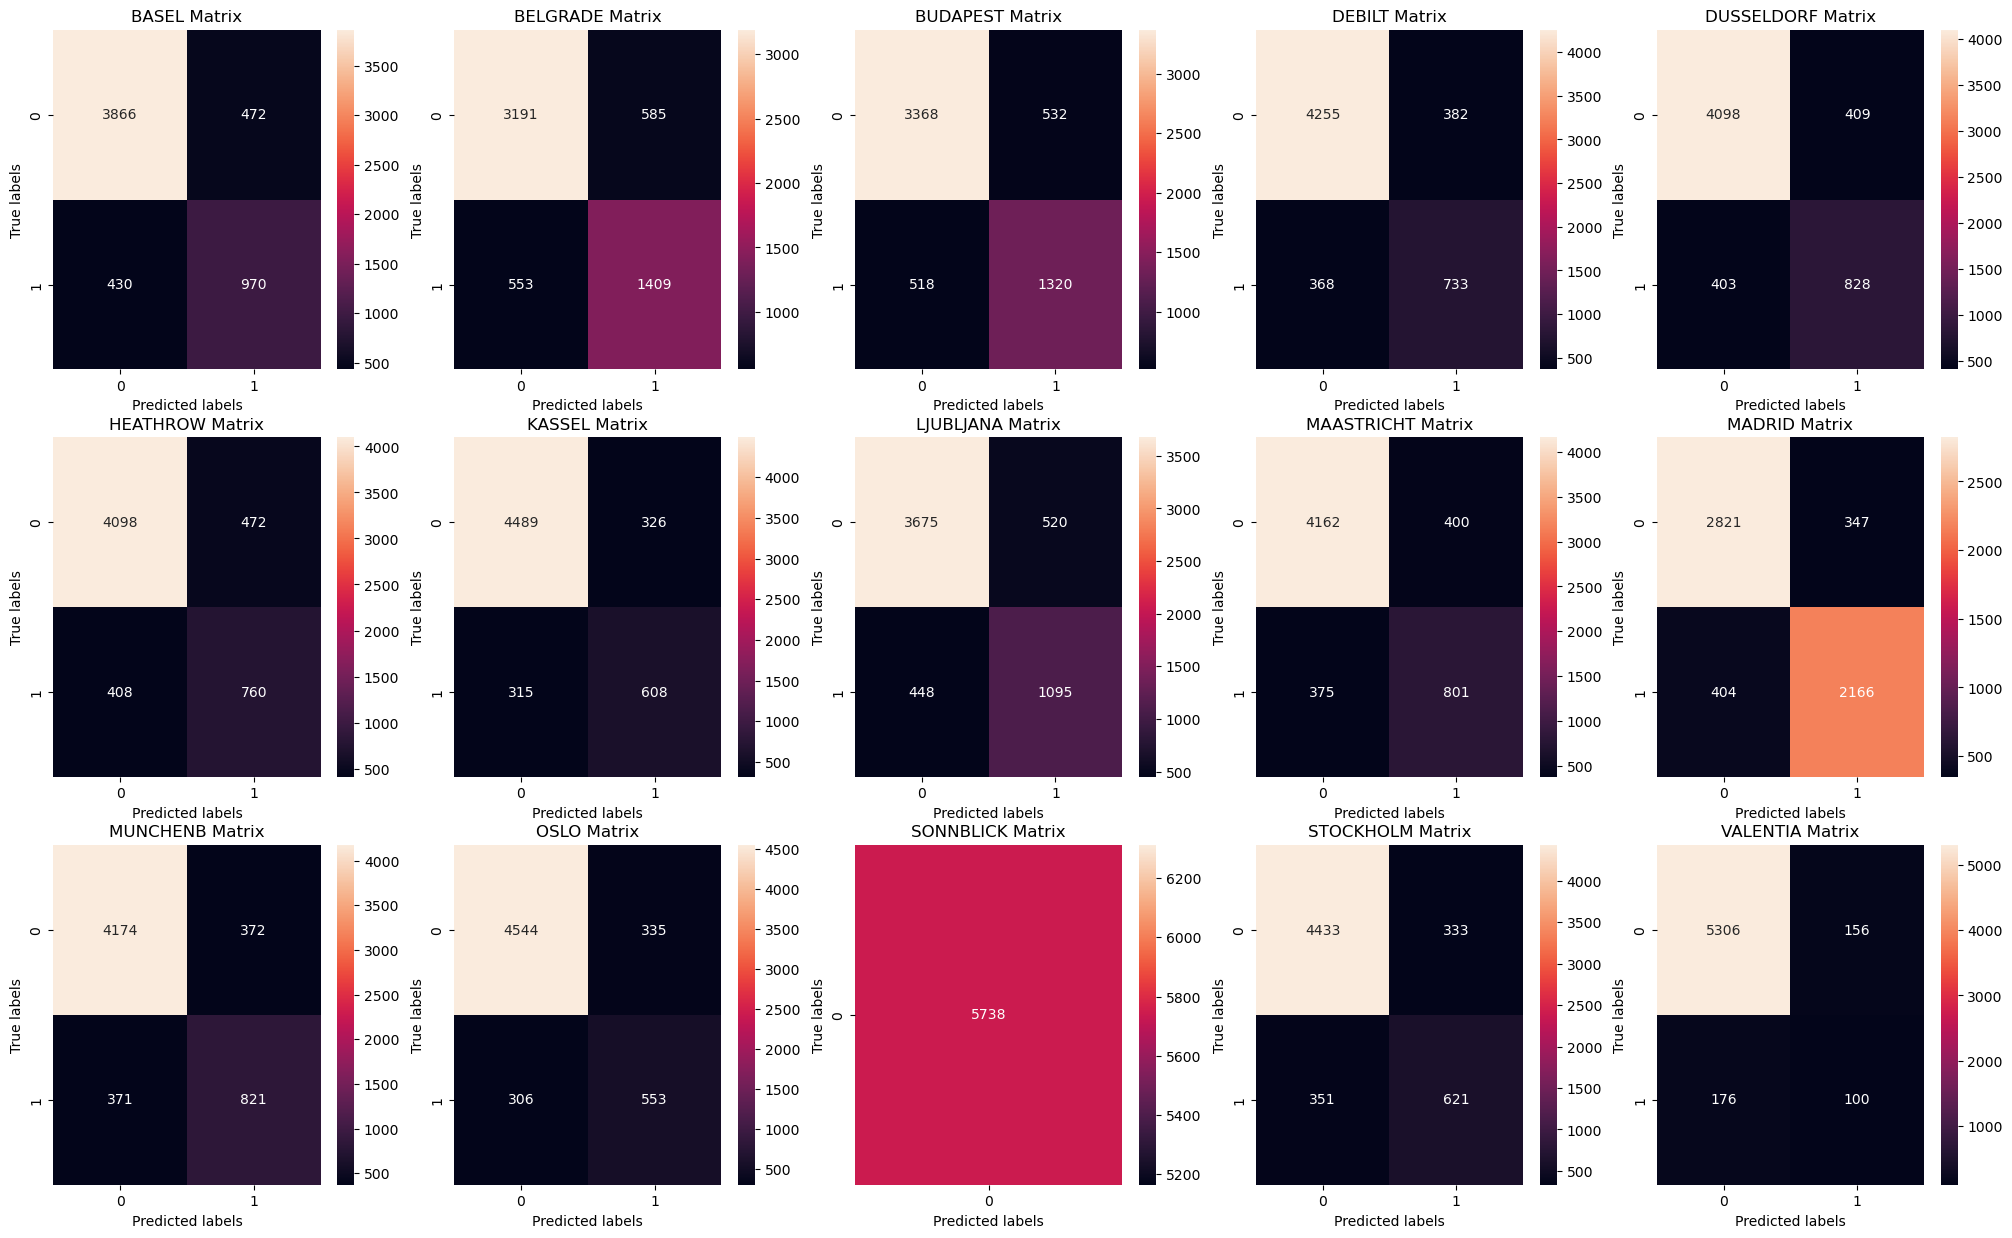

In [14]:
#Confusion matrix based on the last "k" in the sequence (Test data)
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        
figure.savefig(os.path.join(path, 'Supervised', '1.5_ytest_dtree_confusion_matrices.png'))